## The Winton Stock Market Challenge

In [0]:
#Import SciKitLearn
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

#Supervised Learning models -- regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import numpy as np
from numpy import concatenate

from pandas import DataFrame, Series, read_csv, scatter_matrix
import pandas as pd

import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Import data
train_data = read_csv('data/train.csv')
test_data = read_csv('data/test_2.csv')

#### Lets explore the data

In [0]:
#Train data summary
train_data.describe()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
count,40000.00000,6687.000000,30854.000000,38763.000000,32279.000000,40000.000000,38067.000000,40000.000000,39531.000000,38125.000000,...,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04
mean,20000.50000,3.590250,-0.117558,0.558392,0.405572,5.482775,0.430972,49244.971525,0.196958,10.680289,...,0.000049,-3.580980e-06,-9.675766e-06,-1.268935e-05,-0.000017,-0.000057,-0.000210,0.000012,1.504600e+06,1.880750e+06
std,11547.14972,2.798532,1.236250,0.902233,0.799082,2.942324,1.498274,28242.409717,0.138485,2.850634,...,0.001115,1.166019e-03,1.248956e-03,1.217967e-03,0.001208,0.001270,0.025039,0.024160,2.059143e+05,2.573928e+05
min,1.00000,1.000000,-3.440521,-4.643526,-5.440596,1.000000,-0.936644,338.000000,0.009800,0.000000,...,-0.018048,-1.786752e-02,-3.526027e-02,-4.864099e-02,-0.037215,-0.058046,-0.627690,-0.450779,1.000035e+06,1.250044e+06
25%,10000.75000,1.000000,-0.967186,-0.110192,-0.111696,2.000000,-0.265555,26143.000000,0.016600,9.000000,...,-0.000316,-3.943210e-04,-4.091851e-04,-3.649676e-04,-0.000361,-0.000413,-0.010521,-0.010055,1.357070e+06,1.696337e+06
50%,20000.50000,3.000000,-0.389162,0.437228,0.403516,6.000000,0.055564,48457.000000,0.213800,11.000000,...,0.000004,-4.039616e-07,4.016833e-07,6.407432e-07,0.000001,-0.000002,-0.000258,-0.000258,1.477713e+06,1.847142e+06
75%,30000.25000,6.000000,0.414442,1.064754,0.945944,8.000000,0.559921,72387.000000,0.331800,12.000000,...,0.000407,3.820685e-04,4.172179e-04,3.750965e-04,0.000378,0.000364,0.010005,0.009772,1.624389e+06,2.030486e+06
max,40000.00000,10.000000,4.175150,4.530405,2.953163,10.000000,12.609885,99861.000000,0.365000,36.000000,...,0.020781,3.061460e-02,4.406460e-02,2.922928e-02,0.048221,0.026112,0.795602,0.303038,2.761229e+06,3.451536e+06


In [0]:
#Test data summary
test_data.describe()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
count,120000.000000,20862.000000,92476.000000,116256.000000,96560.000000,120000.000000,113984.000000,120000.000000,118590.000000,114201.000000,...,1.180650e+05,1.185290e+05,118240.000000,1.182570e+05,1.181470e+05,118126.000000,118524.000000,118366.000000,118332.000000,1.200000e+05
mean,60000.500000,3.454990,-0.112675,0.565295,0.407434,5.470525,0.439345,50266.614042,0.196162,10.698733,...,6.194883e-06,-9.622281e-06,-0.000026,1.331537e-07,4.108380e-08,0.000011,-0.000009,-0.000008,-0.000001,-2.437955e-06
std,34641.160489,2.769454,1.240008,0.900825,0.795103,2.937602,1.513988,28743.366452,0.138838,2.886395,...,1.041304e-03,1.069177e-03,0.001084,1.057337e-03,1.035391e-03,0.001047,0.001014,0.001004,0.001056,1.045661e-03
min,1.000000,1.000000,-3.550086,-4.489350,-5.720931,1.000000,-0.942462,26.000000,0.009800,0.000000,...,-3.139772e-02,-3.864544e-02,-0.054149,-5.123961e-02,-6.107479e-02,-0.022095,-0.029838,-0.034351,-0.068315,-3.264760e-02
25%,30000.750000,1.000000,-0.964974,-0.105010,-0.116242,2.000000,-0.262306,25690.000000,0.016600,9.000000,...,-3.238135e-04,-3.470817e-04,-0.000348,-3.302182e-04,-3.250314e-04,-0.000330,-0.000343,-0.000339,-0.000336,-3.332796e-04
50%,60000.500000,2.000000,-0.376552,0.443608,0.408145,6.000000,0.055124,49916.000000,0.213800,11.000000,...,3.696872e-07,-4.616798e-07,-0.000001,2.079249e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.624096e-07
75%,90000.250000,5.000000,0.413608,1.081679,0.948233,8.000000,0.563344,74322.000000,0.331800,12.000000,...,3.472874e-04,3.294177e-04,0.000320,3.381466e-04,3.317198e-04,0.000333,0.000341,0.000335,0.000339,3.350474e-04
max,120000.000000,10.000000,4.232618,4.480979,2.880382,10.000000,12.681890,99989.000000,0.365000,36.000000,...,3.481942e-02,5.102139e-02,0.023007,6.121187e-02,4.942143e-02,0.064691,0.023008,0.034111,0.040071,3.085491e-02


In [0]:
train_data.ix[:5,'Ret_MinusTwo':]

,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,6.446240e-04,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,4.843796e-05,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,6.100221e-04,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,3.404036e-04,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,4.518627e-06,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06
5,0.014473,0.007139,-0.000006,0.000914,-0.000247,0.000928,NaN,-0.000227,-0.000002,-5.588487e-07,...,0.000242,0.001412,0.001880,-9.458593e-04,0.000471,0.001193,0.031098,-0.006551,1.431110e+06,1.788888e+06


In [0]:
train_data.ix[:5,'Ret_120':]

,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2.558108e-04,0.000261,0.000238,-0.000113,-0.000248,-0.000351,-0.000003,-0.000002,0.000267,0.000263,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,-3.718829e-04,0.000271,0.000126,0.000655,-0.000515,-0.000924,-0.000769,0.000282,-0.000120,0.000408,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,2.220483e-04,0.000210,-0.000301,-0.000142,0.000068,-0.000508,-0.000122,0.000295,0.000297,-0.000199,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,-4.473375e-07,0.000011,0.000013,0.000622,0.000612,-0.001207,0.001233,-0.001234,-0.000003,0.001226,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06
5,-9.368129e-04,0.000522,0.000421,-0.000710,0.000478,0.000006,0.000936,0.000018,-0.000286,-0.000644,...,0.000242,0.001412,0.001880,-9.458593e-04,0.000471,0.001193,0.031098,-0.006551,1.431110e+06,1.788888e+06


In [0]:
# Count number of NA values in data
train_data.isnull().sum()

Id                     0
Feature_1          33313
Feature_2           9146
Feature_3           1237
Feature_4           7721
Feature_5              0
Feature_6           1933
Feature_7              0
Feature_8            469
Feature_9           1875
Feature_10         19471
Feature_11           987
Feature_12          1096
Feature_13           594
Feature_14           728
Feature_15          2141
Feature_16           610
Feature_17           646
Feature_18           568
Feature_19          1190
Feature_20          7826
Feature_21          1018
Feature_22          1345
Feature_23          1711
Feature_24           726
Feature_25           655
Ret_MinusTwo           0
Ret_MinusOne           0
Ret_2               1054
Ret_3               1245
                   ...  
Ret_155                0
Ret_156                0
Ret_157                0
Ret_158                0
Ret_159                0
Ret_160                0
Ret_161                0
Ret_162                0
Ret_163                0


In [0]:
train_data_mx = train_data.as_matrix()
test_data_mx  = test_data.as_matrix()
print(train_data_mx.shape)
print(test_data_mx.shape)

(40000, 211)
(120000, 147)


In [0]:
# Train data features
train_stock_features = train_data_mx[:,1:26]
train_daily_features = train_data_mx[:,26:28]
train_intraday_features = train_data_mx[:,28:147]
print(train_stock_features.shape)
print(train_daily_features.shape)
print(train_intraday_features.shape)

# Train data target variables
train_intraday_target = train_data_mx[:,147:207]
train_daily_target = train_data_mx[:,207:209]
print(train_intraday_target.shape)
print(train_daily_target.shape)

# Train data weights
train_intraday_weight = train_data_mx[:,209]
train_daily_weight = train_data_mx[:,210]
print(train_intraday_weight.shape)
print(train_daily_weight.shape)

# Test data features
test_stock_features = test_data_mx[:,1:26]
test_daily_features = test_data_mx[:,26:28]
test_intraday_features = test_data_mx[:,28:147]
print(test_stock_features.shape)
print(test_daily_features.shape)
print(test_intraday_features.shape)

(40000, 25)
(40000, 2)
(40000, 119)
(40000, 60)
(40000, 2)
(40000,)
(40000,)
(120000, 25)
(120000, 2)
(120000, 119)


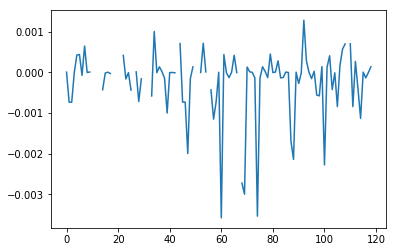

In [0]:
# Plot intraday returns (features) for one security
plt.plot(range(train_intraday_features.shape[1]),train_intraday_features[0])
plt.show()

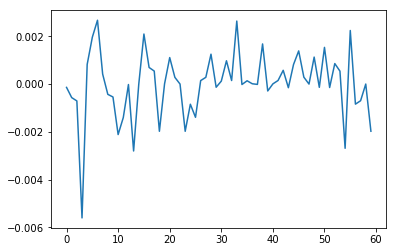

In [0]:
# Plot intraday returns (targets) for one security
plt.plot(range(train_intraday_target.shape[1]),train_intraday_target[0])
plt.show()

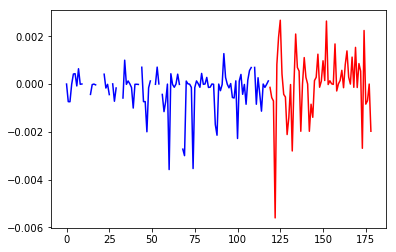

In [0]:
# Combine features and targets
plt.plot(range(119),train_intraday_features[0], c='blue')
plt.plot(range(119,119+60),train_intraday_target[0], c='red')
plt.show()

#### Initially, we will replace NaN with an estimate based on interpolation. 

Our final submission will employ more sophisticated interpolation models

In [0]:
## CANT SEEM TO GET THIS TO WORK
## SEUNG -- COULD YOU DEBUG??

# Replace NaN with linearly interpolated values
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

In [0]:
## CANT SEEM TO GET THIS TO WORK
## SEUNG -- COULD YOU DEBUG??

for row in range(train_data.shape[0]):
    nans, x = nan_helper(train_data[row])
    train_data[row,nans] = np.interp(x(nans), x(~nans), train_data[row,~nans])

for row in range(test_data.shape[0]):
    nans, x = nan_helper(test_data[row])
    train_data[row,nans] = np.interp(x(nans), x(~nans), test_data[row,~nans])

In [0]:
This takes too much time....
#train_data = train_data.interpolate(method='spline', order=1, limit=10, limit_direction='both')

In [0]:
This also takes too long to run..
#test_data = test_data.interpolate(method='spline', order=1, limit=10, limit_direction='both')

In [0]:
###Run this instead
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)


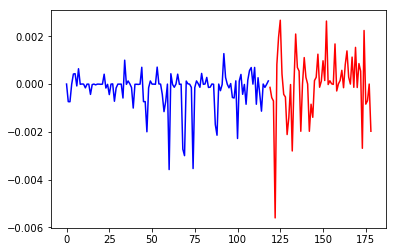

In [0]:

sample_feature_data = train_data.ix[0,'Ret_2':'Ret_120']
sample_target_data = train_data.ix[0,'Ret_121':'Ret_180']

# Combine features and targets
plt.plot(range(119),sample_feature_data, c='blue')
plt.plot(range(119,119+60),sample_target_data, c='red')
plt.show()

#### Save

In [0]:
train_data.to_csv('data/train_data_no_nan.csv')

In [0]:
test_data.to_csv('data/test_data_no_nan.csv')

#### Plot sample feature data after interpolation

In [0]:
train_dataset = read_csv('data/train_data_no_nan.csv')
test_dataset = read_csv('data/test_data_no_nan.csv')

train_values = train_dataset.values
test_values = test_dataset.values

#### Data minus header

In [0]:
train_values[:5]

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          2.88463645e-02,   1.25150797e+06,   1.56438496e+06],
       [  1.00000000e+00,   2.00000000e+00,   0.00000000e+00, ...,
         -1.02532062e-02,   1.73395035e+06,   2.16743794e+06],
       [  2.00000000e+00,   3.00000000e+00,   0.00000000e+00, ...,
          1.57107386e-02,   1.52919738e+06,   1.91149673e+06],
       [  3.00000000e+00,   4.00000000e+00,   0.00000000e+00, ...,
         -2.19045788e-03,   1.71156942e+06,   2.13946178e+06],
       [  4.00000000e+00,   5.00000000e+00,   6.00000000e+00, ...,
         -2.65516002e-02,   1.26727026e+06,   1.58408783e+06]])

In [0]:
train_values = train_values.astype('float64')

#### Scale the data so we can build ML models [Ridge, Lasso, LSTM]

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(train_values)

#### Here we verify number of elements in list 

In [0]:
n_columns = 0
for x in scaled[:1]:
    for y in x:
        n_columns+=1
n_columns

212

#### Determine column and row index for splitting data

In [0]:
t_col_split = train_data.columns.get_loc('Ret_121')
print(t_col_split)

147


In [0]:
t_row_split = int(0.9*len(train_data))
print(t_row_split)

36000


#### Create train & dev test sets

In [0]:
train = train_values[:t_row_split, :]
dev = train_values[t_row_split:, :]

In [0]:
shuffle = np.random.permutation(np.arange(train.shape[0]))

train = train[shuffle]

In [0]:
print(train.shape)

(36000, 212)


In [0]:
print(dev.shape)

(4000, 212)


In [0]:
train_data, train_labels = train[:, :t_col_split] , train[:,t_col_split]
dev_data, dev_labels = dev[:, :t_col_split] , dev[:,t_col_split]

In [0]:
print("Train shape: ", train_data.shape)
print("Dev shape: ", dev_data.shape)

Train shape:  (36000, 147)
Dev shape:  (4000, 147)


### Baseline Model

#### Lets try Linear Regression first


In [0]:
lm = LinearRegression()
lm.fit(train_data, train_labels)

lm_coef = lm.coef_

lm_dev_mse = ((lm.predict(dev_data) - dev_labels) ** 2).mean()

print("Linear model test MSE: ", lm_dev_mse)


Linear model test MSE:  1.04664481927e-06


#### Next we try Ridge 

In [0]:
rm = Ridge(alpha=1, normalize=False)
rm.fit(train_data, train_labels)

rm_dev_mse = ((rm.predict(dev_data) - dev_labels) ** 2).mean()

print("Ridge model test MSE: ", rm_dev_mse)

Ridge model test MSE:  1.04374688747e-06


Alpha is 0.0001
1.04663098489e-06
Linear regression does worse on the test set:  True
Alpha is 0.001
1.04650682172e-06
Linear regression does worse on the test set:  True
Alpha is 0.01
1.04529740315e-06
Linear regression does worse on the test set:  True
Alpha is 0.1
1.0354927485e-06
Linear regression does worse on the test set:  True
Alpha is 1
1.00758088244e-06
Linear regression does worse on the test set:  True
Alpha is 100
1.03164012591e-06
Linear regression does worse on the test set:  True
Alpha is 1000
1.03375474475e-06
Linear regression does worse on the test set:  True
Alpha is 5000
1.03395200737e-06
Linear regression does worse on the test set:  True
Alpha is 10000
1.03397677645e-06
Linear regression does worse on the test set:  True
Alpha is 100000
1.03399908986e-06
Linear regression does worse on the test set:  True
Alpha is 1000000
1.03400132231e-06
Linear regression does worse on the test set:  True
Alpha is 10000000
1.03400154556e-06
Linear regression does worse on the t

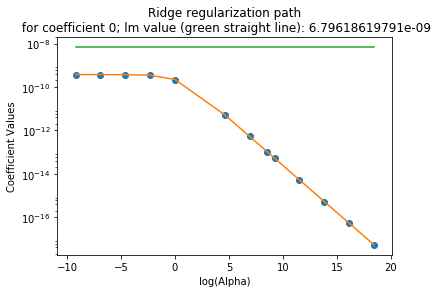

[  3.72984482e-10   3.72771467e-10   3.70626236e-10   3.49441615e-10
   2.20989351e-10   5.19236566e-12   5.24749447e-13   1.05048389e-13
   5.25303534e-14   5.25358971e-15   5.25364515e-16   5.25365069e-17
   5.25365125e-18]


In [0]:

alpha_vec = [0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10000, 100000, 1000000, 10000000, 100000000]
coef_idx = 0
coef_values = np.zeros(len(alpha_vec))
lm_coef_line = np.zeros(len(alpha_vec))

lm = LinearRegression()
lm.fit(train_data, train_labels)
lm_coef = lm.coef_[coef_idx]
lm_dev_mse = ((lm.predict(dev_data) - dev_labels) ** 2).mean()

for aa_idx, aa in enumerate(alpha_vec):
    rm = Ridge(alpha=aa, normalize=True)
    rm.fit(train_data, train_labels)
    rm_coef = rm.coef_[coef_idx]
    
    coef_values[aa_idx] = rm_coef
    lm_coef_line[aa_idx] = lm_coef
    
    rm_dev_mse = ((rm.predict(dev_data) - dev_labels) ** 2).mean()
    print("Alpha is", aa)
    print(rm_dev_mse)
    print("Linear regression does worse on the test set: ", lm_dev_mse > rm_dev_mse)
    
plt.plot(np.log(alpha_vec), lm_coef_line * 0)    
plt.plot(np.log(alpha_vec), coef_values)
plt.plot(np.log(alpha_vec), lm_coef_line)
plt.scatter(np.log(alpha_vec), coef_values)
plt.title('Ridge regularization path\n for coefficient ' + str(coef_idx) + '; lm value (green straight line): ' + str(lm_coef))
plt.ylabel('Coefficient Values') 
plt.xlabel('log(Alpha)') 
plt.yscale('log')
plt.show()

print(coef_values)

####  How about Lasso

Alpha is  1e-10
1.04659146062e-06
Linear regression does worse on the test set:  True
Alpha is  1e-09
1.04611374942e-06
Linear regression does worse on the test set:  True
Alpha is  1e-08
1.0420886946e-06
Linear regression does worse on the test set:  True
Alpha is  1e-07
1.03234395175e-06
Linear regression does worse on the test set:  True
Alpha is  1e-06
1.03177297255e-06
Linear regression does worse on the test set:  True
[  7.44099721e-10   7.27154233e-10   5.54867859e-10   0.00000000e+00
   0.00000000e+00]


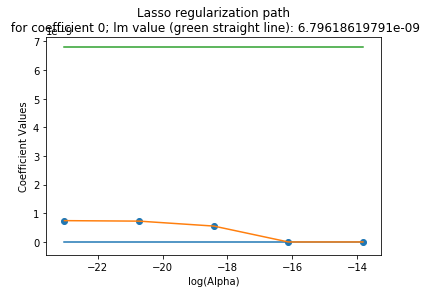

In [0]:
alpha_vec = [ 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001]
coef_idx = 0
coef_values = np.zeros(len(alpha_vec))
lm_coef_line = np.zeros(len(alpha_vec))

lm = LinearRegression()
lm.fit(train_data, train_labels)
lm_coef = lm.coef_[coef_idx]
lm_dev_mse = ((lm.predict(dev_data) - dev_labels) ** 2).mean()

for aa_idx, aa in enumerate(alpha_vec):

    las = Lasso(alpha=aa, normalize=True, max_iter=1000)
    las.fit(train_data, train_labels)
    las_coef = las.coef_[coef_idx]
 
    coef_values[aa_idx] = las_coef
    lm_coef_line[aa_idx] = lm_coef

    las_dev_mse = ((las.predict(dev_data) - dev_labels) ** 2).mean()
    print("Alpha is ", aa)
    print(las_dev_mse)
    print("Linear regression does worse on the test set: ", lm_dev_mse > las_dev_mse)
    
print(coef_values)

plt.plot(np.log(alpha_vec), lm_coef_line * 0)
plt.plot(np.log(alpha_vec), coef_values)
plt.plot(np.log(alpha_vec), lm_coef_line)
plt.scatter(np.log(alpha_vec), coef_values)
plt.title('Lasso regularization path\n for coefficient ' + str(coef_idx) + 
          '; lm value (green straight line): ' + str(lm_coef))
plt.ylabel('Coefficient Values') 
plt.xlabel('log(Alpha)') 
plt.show()

### Finally, we settle on LSTM model 

Here we train model against t121 to Ret_Plus_Two 

Using example from: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

#### Lets fit LSTM model

Here we use Keras -- need to confirm that Professor is ok with us using this library

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

In [0]:
train_X = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
dev_X = dev_data.reshape((dev_data.shape[0], 1, dev_data.shape[1]))
print(train_X.shape, train_labels.shape, dev_X.shape, dev_labels.shape)

(36000, 1, 147) (36000,) (4000, 1, 147) (4000,)


Train on 36000 samples, validate on 4000 samples
Epoch 1/63
 - 2s - loss: 0.1739 - val_loss: 0.0416
Epoch 2/63
 - 1s - loss: 0.0189 - val_loss: 0.0371
Epoch 3/63
 - 1s - loss: 0.0187 - val_loss: 0.0192
Epoch 4/63
 - 1s - loss: 0.0180 - val_loss: 0.0119
Epoch 5/63
 - 1s - loss: 0.0145 - val_loss: 0.0172
Epoch 6/63
 - 1s - loss: 0.0174 - val_loss: 0.0088
Epoch 7/63
 - 1s - loss: 0.0110 - val_loss: 0.0131
Epoch 8/63
 - 1s - loss: 0.0087 - val_loss: 0.0139
Epoch 9/63
 - 1s - loss: 0.0109 - val_loss: 0.0049
Epoch 10/63
 - 1s - loss: 0.0087 - val_loss: 0.0105
Epoch 11/63
 - 1s - loss: 0.0088 - val_loss: 0.0104
Epoch 12/63
 - 1s - loss: 0.0064 - val_loss: 0.0120
Epoch 13/63
 - 1s - loss: 0.0045 - val_loss: 0.0032
Epoch 14/63
 - 1s - loss: 0.0039 - val_loss: 0.0047
Epoch 15/63
 - 1s - loss: 0.0031 - val_loss: 0.0104
Epoch 16/63
 - 1s - loss: 0.0049 - val_loss: 0.0048
Epoch 17/63
 - 1s - loss: 0.0041 - val_loss: 0.0088
Epoch 18/63
 - 1s - loss: 0.0038 - val_loss: 0.0024
Epoch 19/63
 - 1s - loss

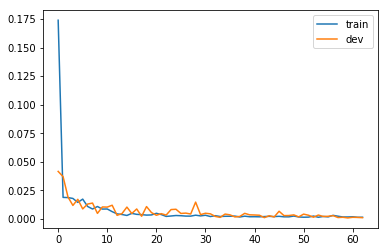

In [0]:
num_epochs = n_columns - t_col_split - 2

# we use a basic network design 
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Here we simply fit network
history = model.fit(train_X, train_labels, epochs=num_epochs, batch_size=144, validation_data=(dev_X, dev_labels), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='dev')
plt.legend()
plt.show()

#### Now lets evaluate the model

In [0]:
print((concatenate((yhat, dev_X[:, 1:]), axis=1).shape))

(4000, 147)


In [0]:
# make a prediction
yhat = model.predict(dev_X)
dev_X = dev_X.reshape((dev_X.shape[0], dev_X.shape[2]))

print("dev_X shape: ",dev_X.shape)
print("yhat shape: ", yhat.shape)

#invert scaling for forecast
inv_yhat = concatenate((yhat, dev_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


# invert scaling for actual
dev_labels = dev_labels.reshape((len(dev_labels), 1))
inv_y = concatenate((dev_labels, dev_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

dev_X shape:  (4000, 147)
yhat shape:  (4000, 1)


ValueError: operands could not be broadcast together with shapes (4000,147) (212,) (4000,147) 